In [2]:
import numpy as np
import heapq
import pandas as pd
from collections import OrderedDict

In [3]:
x1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]

y1 = [1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3]

z1 = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]

x2 = [1,1,2,1,2,2,1,1,1,2,2,1,1,2,2,2,1,1,2,1,2,2,1,1,2,3,3,1,1,2,3,3,1,1,1,2,2,3,3,3,1,1,1,2,2,3,3,3,1,1,2,3,3,1,1,2,3,3,2,3,3,2,2,3,2,2,3,3,3,2,2,2,3,3,2,3,3,2,2,3,1,1,2,2,1,1,2,2,1,2,1,1,1,2,2,2,1,1,1,2,2,2,1,1,2,2,1,1,2,2,1,1,2,2,1,2,1,1,2,2,3,3,1,1,2,2,3,3,1,1,3,3,1,1,2,2,3,3,1,1,2,2,3,3,1,1,3,3,2,2,3,3,2,2,3,3,2,3,2,2,2,3,3,3,2,2,2,3,3,3,2,2,3,3,2,2,3,3,2,2,3,3,2,3,1,1,2,1,2,2,1,1,1,2,2,1,1,2,2,2,1,1,2,1,2,2,1,1,2,3,3,1,1,2,3,3,1,1,1,2,2,3,3,3,1,1,1,2,2,3,3,3,1,1,2,3,3,1,1,2,3,3,2,3,3,2,2,3,2,2,3,3,3,2,2,2,3,3,2,3,3,2,2,3]

y2 = [1,2,1,2,1,2,1,2,3,1,3,1,3,1,2,3,2,3,3,2,2,3,1,2,1,1,2,1,2,2,1,2,1,2,3,1,3,1,2,3,1,2,3,1,3,1,2,3,2,3,3,2,3,2,3,2,2,3,1,1,2,1,2,2,1,3,1,2,3,1,2,3,1,3,3,2,3,2,3,2,1,2,1,2,1,2,1,2,2,1,1,2,3,1,2,3,1,2,3,1,2,3,1,3,1,3,2,3,2,3,2,3,2,3,2,3,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,2,3,2,3,2,3,2,3,2,3,2,3,2,3,2,3,1,2,1,2,1,2,1,2,1,2,1,2,3,1,2,3,1,2,3,1,2,3,1,3,1,3,2,3,2,3,2,3,2,3,3,2,1,2,1,2,1,2,1,2,3,1,3,1,3,1,2,3,2,3,3,2,2,3,1,2,1,1,2,1,2,2,1,2,1,2,3,1,3,1,2,3,1,2,3,1,3,1,2,3,2,3,3,2,3,2,3,2,2,3,1,1,2,1,2,2,1,3,1,2,3,1,2,3,1,3,3,2,3,2,3,2]

z2 = [2,2,2,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,1,1,1,2,2,2,2,2,1,1,1,1,1,2,2,2,1,1,1,3,3,3,3,1,1,1,1,2,2,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,3,3,3,3,1,1,1,1,2,2,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,3,3,3,3,1,1,1,1,2,2,3,3,3,3,3,3,1,1,1,1,1,1,2,2,2,2,3,3,3,3,1,1,1,1,2,2,2,2,2,3,3,3,2,2,2,2,2,3,3,3,3,3,2,2,2,3,3,3,2,2,2,2,2,3,3,3,3,3,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,2,2,2,2,2,3,3,3,3,3,2,2,2,3,3,3,2,2,2,2,2,3,3,3,3,3,2,2,2,3,3,3]

In [7]:
coord_pairs = pd.DataFrame( OrderedDict((('x1', pd.Series(x1)), ('y1', pd.Series(y1)), ('z1', pd.Series(z1)), ('x2', pd.Series(x2)), ('y2', pd.Series(y2)), ('z2', pd.Series(z2)))))

coord_pairs = coord_pairs.sort_values(['x1', 'y1', 'z1'], ascending=[True,True,True])

print(coord_pairs)

     x1  y1  z1  x2  y2  z2
0     1   1   1   1   1   2
1     1   1   1   1   2   2
2     1   1   1   2   1   2
3     1   1   1   1   2   1
4     1   1   1   2   1   1
..   ..  ..  ..  ..  ..  ..
259   3   3   3   3   2   2
260   3   3   3   3   3   2
261   3   3   3   2   2   3
262   3   3   3   2   3   3
263   3   3   3   3   2   3

[264 rows x 6 columns]


In [8]:
start = (1,1,1)
goal = (3,3,3)

In [11]:
def available_neighbours(current_x,current_y,current_z):

    return list(zip(coord_pairs.loc[(coord_pairs.x1 == current_x) & (coord_pairs.y1 == current_y) & (coord_pairs.z1 == current_z)][["x2"]].x2,

    coord_pairs.loc[(coord_pairs.x1 == current_x) & (coord_pairs.y1 == current_y) & (coord_pairs.z1 == current_z)][["y2"]].y2,

    coord_pairs.loc[(coord_pairs.x1 == current_x) & (coord_pairs.y1 == current_y) & (coord_pairs.z1 == current_z)][["z2"]].z2))

In [12]:
def heuristic(a, b):

    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2 + (b[2] - a[2]) ** 2)

In [16]:
def astar(start, goal):

    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []
    
    heapq.heappush(oheap, (fscore[start], start))
    while oheap:
        current = heapq.heappop(oheap)[1]
        neighbours = available_neighbours(current[0],current[1],current[2])
        
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data
        
        close_set.add(current)
        for x, y, z in neighbours:
            neighbour = x, y, z
            tentative_g_score = gscore[current] + heuristic(current, neighbour)
            if neighbour in close_set and tentative_g_score >= gscore.get(neighbour, 0):
                continue
                
            if tentative_g_score < gscore.get(neighbour, 0) or neighbour not in [i[1]for i in oheap]:
                came_from[neighbour] = current
                gscore[neighbour] = tentative_g_score
                fscore[neighbour] = tentative_g_score + heuristic(neighbour, goal)
                heapq.heappush(oheap, (fscore[neighbour], neighbour))
    return False

In [17]:
route = astar(start, goal)
route = route + [start]
route = route[::-1]
print(route)

[(1, 1, 1), (1, 1, 2), (2, 2, 3), (3, 3, 3)]


In [18]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [19]:
x_coords = []
y_coords = []
z_coords = []

for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    z = route[i][2]
    
    x_coords.append(x)
    y_coords.append(y)
    z_coords.append(z)

x_coords = np.array(x_coords)
y_coords = np.array(y_coords)
z_coords = np.array(z_coords)



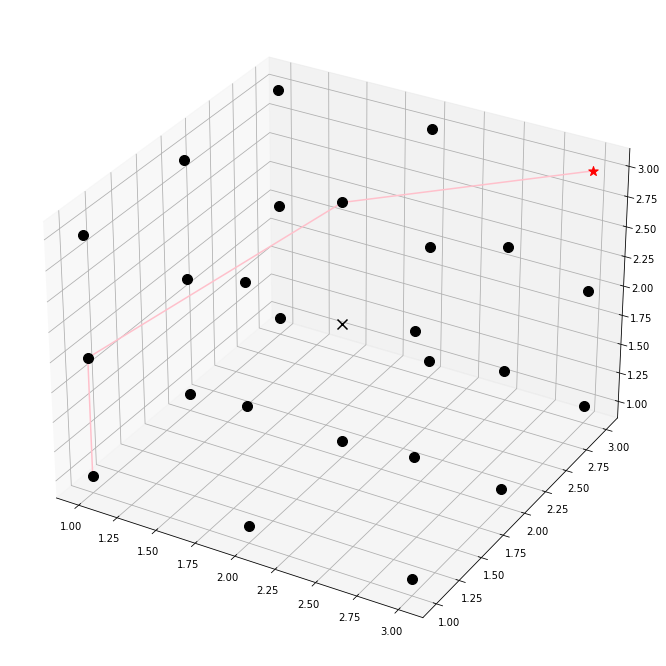

In [20]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(goal[0],goal[1],goal[2], marker = "*", color = "red", s = 100)

ax.scatter3D(1,1,1,marker = "o", color = "black", s = 100)
ax.scatter3D(1,2,1,marker = "o", color = "black", s = 100)
ax.scatter3D(1,3,1,marker = "o", color = "black", s = 100)
ax.scatter3D(2,1,1,marker = "o", color = "black", s = 100)
ax.scatter3D(2,2,1,marker = "o", color = "black", s = 100)
ax.scatter3D(2,3,1,marker = "o", color = "black", s = 100)
ax.scatter3D(3,1,1,marker = "o", color = "black", s = 100)
ax.scatter3D(3,2,1,marker = "o", color = "black", s = 100)
ax.scatter3D(3,3,1,marker = "o", color = "black", s = 100)
ax.scatter3D(1,1,2,marker = "o", color = "black", s = 100)
ax.scatter3D(1,2,2,marker = "o", color = "black", s = 100)
ax.scatter3D(1,3,2,marker = "o", color = "black", s = 100)
ax.scatter3D(2,1,2,marker = "o", color = "black", s = 100)
ax.scatter3D(2,2,2,marker = "x", color = "black", s = 100)
ax.scatter3D(2,3,2,marker = "o", color = "black", s = 100)
ax.scatter3D(3,1,2,marker = "o", color = "black", s = 100)
ax.scatter3D(3,2,2,marker = "o", color = "black", s = 100)
ax.scatter3D(3,3,2,marker = "o", color = "black", s = 100)
ax.scatter3D(1,1,3,marker = "o", color = "black", s = 100)
ax.scatter3D(1,2,3,marker = "o", color = "black", s = 100)
ax.scatter3D(1,3,3,marker = "o", color = "black", s = 100)
ax.scatter3D(2,1,3,marker = "o", color = "black", s = 100)
ax.scatter3D(2,2,3,marker = "o", color = "black", s = 100)
ax.scatter3D(2,3,3,marker = "o", color = "black", s = 100)
ax.scatter3D(3,1,3,marker = "o", color = "black", s = 100)
ax.scatter3D(3,2,3,marker = "o", color = "black", s = 100)

#ax.scatter3D(3,3,3,marker = "o", color = "black", s = 100)
ax.plot3D(x_coords, y_coords, z_coords, color = "pink")
plt.show()